## Linear Regression

In [20]:
# Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# load the datasets
train_data = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
eval_data = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

# Separate features and labels
y_train = train_data.pop('survived')
y_eval = eval_data.pop('survived')

In [29]:

# Identify categorical and numeric columns
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

# Preprocess the data
def preprocess_data(data):
    processed = data.copy()

    # Handle categorical columns
    for col in CATEGORICAL_COLUMNS:
        processed[col] = pd.Categorical(processed[col]).codes

    # Handle numeric columns
    scaler = StandardScaler()
    processed[NUMERIC_COLUMNS] = scaler.fit_transform(processed[NUMERIC_COLUMNS])

    return processed

X_train = preprocess_data(train_data)
X_eval = preprocess_data(eval_data)

In [31]:
X_train.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,1,-0.610415,1,0,-0.497403,2,7,2,0
1,0,0.669397,1,0,0.676353,0,2,0,0
2,0,-0.290462,0,0,-0.485030,2,7,2,1
3,0,0.429432,1,0,0.343046,0,2,2,0
4,1,-0.130485,0,0,-0.475254,2,7,1,1


In [23]:

# Define the model - Linear regression in this case

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, verbose=0)

# Evaluate the model
result = model.evaluate(X_eval, y_eval)
print(f"Test accuracy: {result[1]:.4f}")

# Make predictions
pred_probs = model.predict(X_eval).flatten()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8207 - loss: 0.4590 
Test accuracy: 0.8144
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


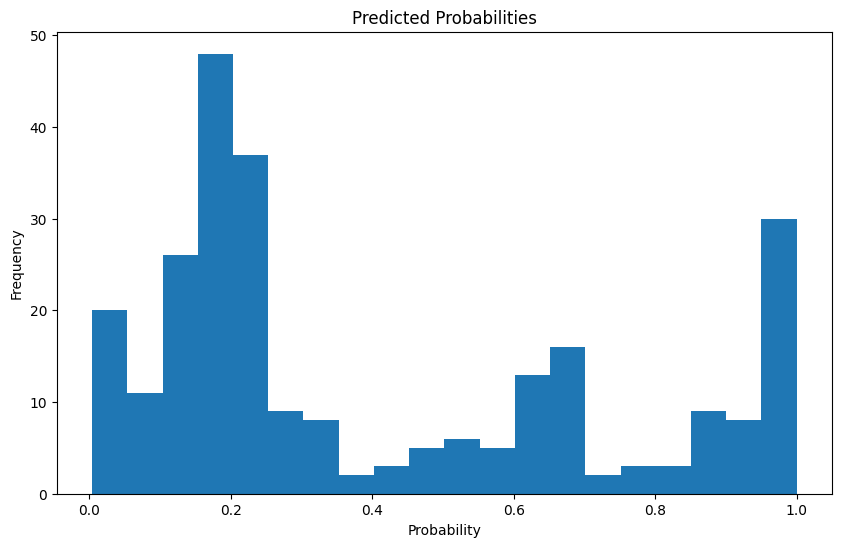

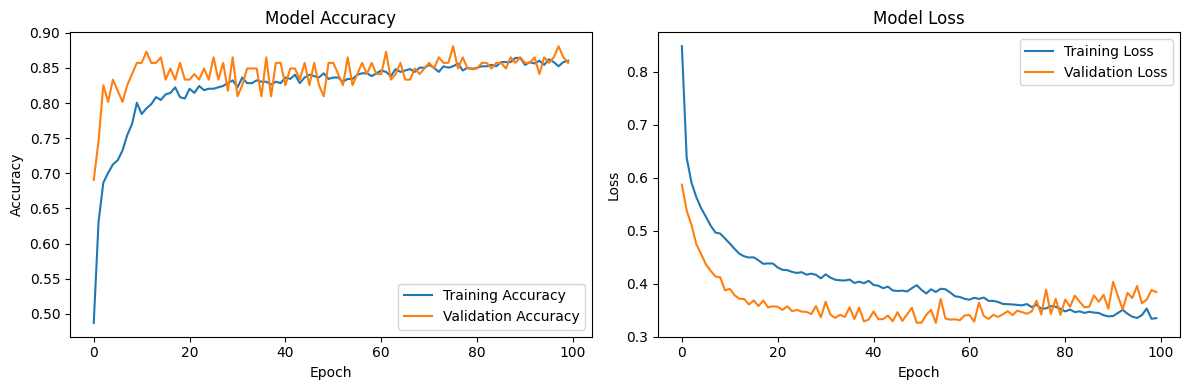

In [18]:
# Plot the histogram of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(pred_probs, bins=20)
plt.title('Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()